In [1]:
%cd ..

C:\Users\euare\repositories\cpc


In [2]:
from src.api import *
from src.curveproduction.cost_potential_curve import *
#initialize()

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:209: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.centroid.x
C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:210: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.centroid.y


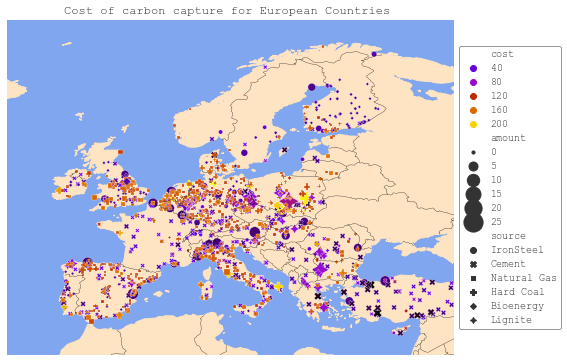

In [3]:
distribution = cost_emission_distribution(["basic", "cement", "iron"])
distribution.plot()

In [4]:
collection = CurveCollection.from_boundaries(distribution, ["DE", "ES", "IT"], ["Hard Coal", "Natural Gas", "Lignite"])

In [5]:
collection

Curve collection,  Regions: DE, ES, IT, Sources: Hard Coal, Natural Gas, Lignite

<AxesSubplot:title={'center':'Cost of captured carbon'}, xlabel='Captured carbon (Mt/y)', ylabel='Cost (€/t)'>

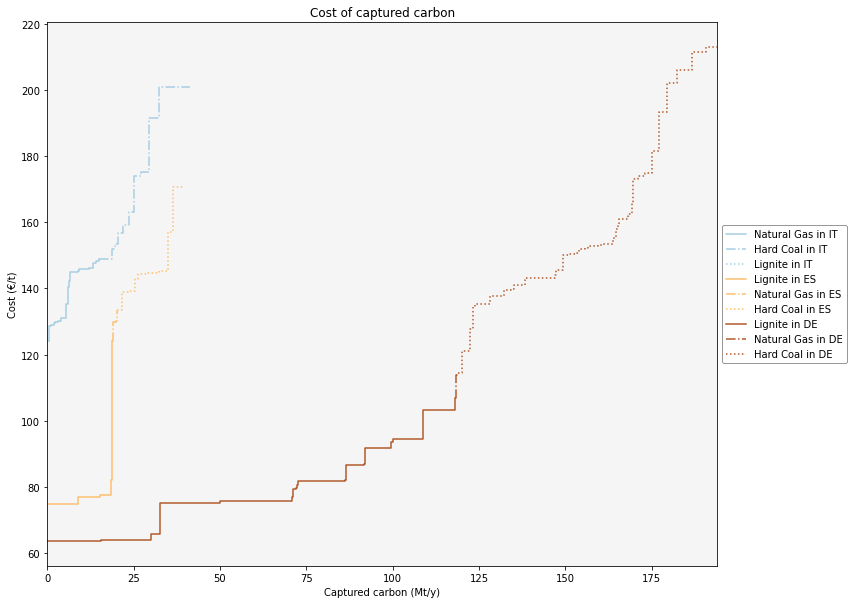

In [6]:
import matplotlib.pyplot as plt
fig , ax = plt.subplots(figsize=(12,10))
collection.plot(ax)

In [7]:
distribution.data.source.unique()

array(['IronSteel', 'Cement', 'Natural Gas', 'Hard Coal', 'Bioenergy',
       'Lignite'], dtype=object)

<AxesSubplot:xlabel='Captured carbon (Mt/y)', ylabel='Cost (€/t)'>

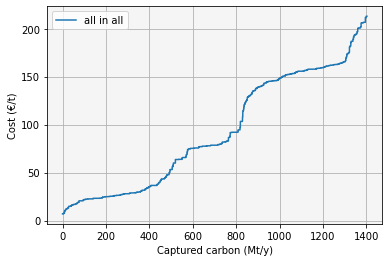

In [8]:
fig, ax = plt.subplots()
cc = CostCurve(distribution.data)
cc.plot(ax)

In [9]:
scenarios = scenario_development_one_hot_encoded(["basic", "cement", "iron"], ["1.5C"])


C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:209: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lon"] = gdf.centroid.x
C:\Users\euare\repositories\cpc\src\curveproduction\geo_distribution_data.py:210: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf["lat"] = gdf.centroid.y


In [10]:
curve_scen = produce_scenario_curve(scenarios, "1.5C", 2025)
print(curve_scen.curve)

         source        cost variable       amount
0        Cement    6.937014    lower     0.000000
1        Cement    6.937014    upper     4.621946
2        Cement    7.722348    lower     4.621946
3        Cement    7.722348    upper     8.773856
4        Cement    9.836554    lower     8.773856
...         ...         ...      ...          ...
2671  Hard Coal  212.970991    upper  1000.853515
2672  IronSteel         NaN    upper  1000.853515
2673  IronSteel         NaN    upper  1000.853515
2674  IronSteel         NaN    lower  1000.853515
2675  IronSteel         NaN    lower  1000.853515

[2676 rows x 4 columns]


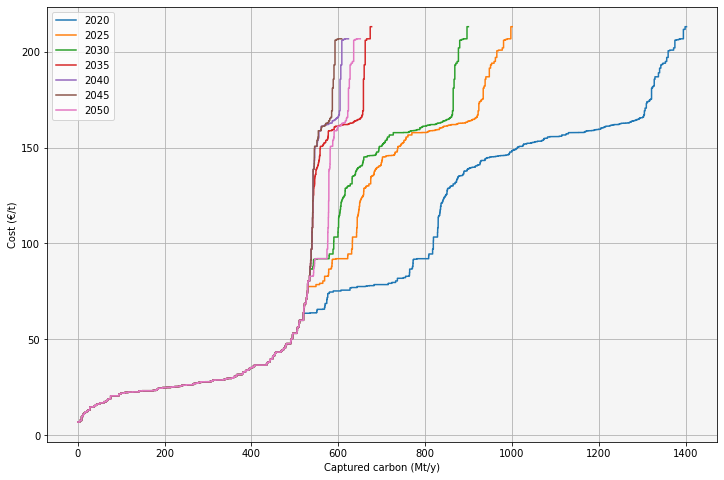

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
curve_scen= CostCurve(scenarios)
curve_scen.plot_sc(ax, 2020)
for year in [2025, 2030, 2035,2040,2045, 2050]:
    curve_scen = produce_scenario_curve(scenarios, "1.5C", year)
    curve_scen.plot_sc(ax, year)

<AxesSubplot:xlabel='Captured carbon (Mt/y)', ylabel='Cost (€/t)'>

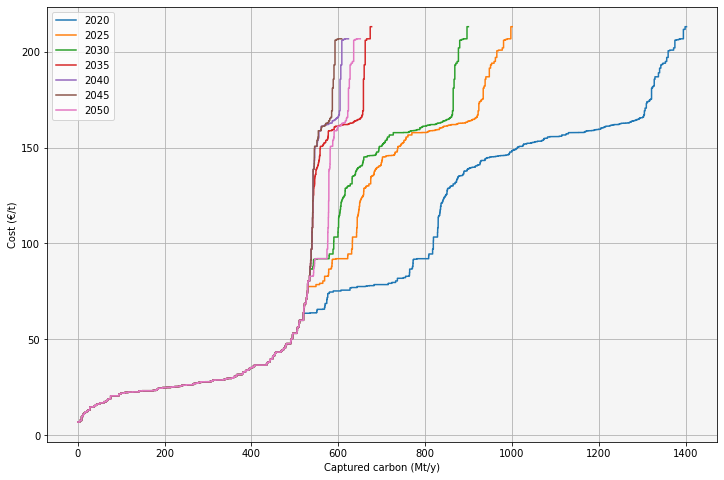

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
produce_scenario_collection(scenarios, "1.5C",ax)